## HCR Cell quantification

This notebook details how to generate a disc plot of gene expression and cell density throughout the LS

#### Import libraries

In [1]:
library(cowplot)
library(reshape2)
library(gridExtra)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(plotly)
library(dplyr)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




#### Quantifying gene expression

HCR probes are technically optimized to be resolvable at 20x, but due to the size of the septum, we imaged it at 10x. To assess gene expression, we decided to rely on signal intensity rather than spot counts, but spot counts were first used to determine whether a given cell should be considered postiive for each gene.

In [2]:
#read in data
#data include all cells, from all animals in the study
WT.bind <- readRDS("HCR_files/spot_counts.rds")

In [3]:
#subset spot data from large dataframe
grab.spots<-colnames(WT.bind[grep('.Copies',colnames(WT.bind))])
WT.spots <- WT.bind[grab.spots]
rownames(WT.spots) <- WT.bind$barcode

In [4]:
#if cell has gene expression lower than 5 spots, consider it negative
WT.spots[WT.spots < 5] <- 0
WT.spots[WT.spots == 0] <- NA

Now looking at cell intensity as a metric for gene expression for only the cells that are considered positive for each gene

In [5]:
int <- readRDS(file='HCR_files/cell_intensity.rds')

In [6]:
colnames(int) <- gsub(".Cell.Intensity", "", colnames(int))
rownames(int) <- int$barcode
int$barcode <- NULL

In [7]:
WT.spots.mask <- WT.spots == 0
dim(WT.spots.mask)

[1] 237684     15

In [8]:
int.masked <- replace(int, !WT.spots.mask, 0)
colMeans(int.masked)

drd2       drd3        sst      tacr1       esr1      foxp2     vglut2 
0.34516014 0.22187455 0.31577557 0.56595189 0.07434268 1.30659197 0.34556127 
      pax6        nts      crhr2        met    col15a1      samd3       vgat 
0.05931063 0.38593323 0.72622386 0.59400269 0.12858235 0.03993427 0.01026346 
   onecut2 
0.02568934

In [9]:
int.masked[int.masked==0] <- NA

Tedious way of splitting the data up by animal and section. Animal IDs range from WT-1 to WT-8. S2-6 refers to section order.

In [10]:
WT1S2 <- int.masked[grep("WT-1-S2",rownames(int.masked)),]
WT1S3 <- int.masked[grep("WT-1-S3",rownames(int.masked)),]
WT1S4 <- int.masked[grep("WT-1-S4",rownames(int.masked)),]
WT1S5 <- int.masked[grep("WT-1-S5",rownames(int.masked)),]

In [11]:
WT2S2 <- int.masked[grep("WT-2-S2",rownames(int.masked)),]
WT2S3 <- int.masked[grep("WT-2-S3",rownames(int.masked)),]
WT2S4 <- int.masked[grep("WT-2-S4",rownames(int.masked)),]
WT2S5 <- int.masked[grep("WT-2-S6",rownames(int.masked)),]

In [12]:
WT3S2 <- int.masked[grep("WT-3-S2",rownames(int.masked)),]
WT3S3 <- int.masked[grep("WT-3-S4",rownames(int.masked)),]
WT3S4 <- int.masked[grep("WT-3-S5",rownames(int.masked)),]
WT3S5 <- int.masked[grep("WT-3-S6",rownames(int.masked)),]

In [13]:
WT4S2 <- int.masked[grep("WT-4-S3",rownames(int.masked)),]
WT4S3 <- int.masked[grep("WT-4-S4",rownames(int.masked)),]
WT4S4 <- int.masked[grep("WT-4-S5",rownames(int.masked)),]

In [14]:
WT5S3 <- int.masked[grep("WT-5-S3",rownames(int.masked)),]
WT5S4 <- int.masked[grep("WT-5-S4",rownames(int.masked)),]
WT5S5 <- int.masked[grep("WT-5-S6",rownames(int.masked)),]

In [15]:
WT6S2 <- int.masked[grep("WT-6-S2",rownames(int.masked)),]
WT6S3 <- int.masked[grep("WT-6-S3",rownames(int.masked)),]
WT6S4 <- int.masked[grep("WT-6-S4",rownames(int.masked)),]
WT6S5 <- int.masked[grep("WT-6-S5",rownames(int.masked)),]

In [16]:
WT7S3 <- int.masked[grep("WT-7-S3",rownames(int.masked)),]
WT7S4 <- int.masked[grep("WT-7-S4",rownames(int.masked)),]
WT7S5 <- int.masked[grep("WT-7-S6",rownames(int.masked)),]

In [17]:
WT8S2 <- int.masked[grep("WT-8-S2",rownames(int.masked)),]
WT8S3 <- int.masked[grep("WT-8-S3",rownames(int.masked)),]
WT8S4 <- int.masked[grep("WT-8-S4",rownames(int.masked)),]
WT8S5 <- int.masked[grep("WT-8-S6",rownames(int.masked)),]

Summarize mean intensity over each animal and section

In [18]:
WT1S2 <- summarize_if(WT1S2, is.numeric, mean, na.rm = TRUE)
WT1S3 <- summarize_if(WT1S3, is.numeric, mean, na.rm = TRUE)
WT1S4 <- summarize_if(WT1S4, is.numeric, mean, na.rm = TRUE)
WT1S5 <- summarize_if(WT1S5, is.numeric, mean, na.rm = TRUE)

WT2S2 <- summarize_if(WT2S2, is.numeric, mean, na.rm = TRUE)
WT2S3 <- summarize_if(WT2S3, is.numeric, mean, na.rm = TRUE)
WT2S4 <- summarize_if(WT2S4, is.numeric, mean, na.rm = TRUE)
WT2S5 <- summarize_if(WT2S5, is.numeric, mean, na.rm = TRUE)

WT3S2 <- summarize_if(WT3S2, is.numeric, mean, na.rm = TRUE)
WT3S3 <- summarize_if(WT3S3, is.numeric, mean, na.rm = TRUE)
WT3S4 <- summarize_if(WT3S4, is.numeric, mean, na.rm = TRUE)
WT3S5 <- summarize_if(WT3S5, is.numeric, mean, na.rm = TRUE)

WT4S2 <- summarize_if(WT4S2, is.numeric, mean, na.rm = TRUE)
WT4S3 <- summarize_if(WT4S3, is.numeric, mean, na.rm = TRUE)
WT4S4 <- summarize_if(WT4S4, is.numeric, mean, na.rm = TRUE)

WT5S2 <- summarize_if(WT5S3, is.numeric, mean, na.rm = TRUE)
WT5S3 <- summarize_if(WT5S3, is.numeric, mean, na.rm = TRUE)
WT5S5 <- summarize_if(WT5S5, is.numeric, mean, na.rm = TRUE)

WT6S2 <- summarize_if(WT6S2, is.numeric, mean, na.rm = TRUE)
WT6S3 <- summarize_if(WT6S3, is.numeric, mean, na.rm = TRUE)
WT6S4 <- summarize_if(WT6S4, is.numeric, mean, na.rm = TRUE)
WT6S5 <- summarize_if(WT6S5, is.numeric, mean, na.rm = TRUE)

WT7S3 <- summarize_if(WT7S3, is.numeric, mean, na.rm = TRUE)
WT7S4 <- summarize_if(WT7S4, is.numeric, mean, na.rm = TRUE)
WT7S5 <- summarize_if(WT7S5, is.numeric, mean, na.rm = TRUE)

WT8S2 <- summarize_if(WT8S2, is.numeric, mean, na.rm = TRUE)
WT8S3 <- summarize_if(WT8S3, is.numeric, mean, na.rm = TRUE)
WT8S4 <- summarize_if(WT8S4, is.numeric, mean, na.rm = TRUE)
WT8S5 <- summarize_if(WT8S5, is.numeric, mean, na.rm = TRUE)

Combine into dataframes for each section/coordinate

In [19]:
S1 <- rbind(WT1S2, WT2S2, WT3S2, WT4S2, WT5S2, WT6S2, WT8S2)
S2 <- rbind(WT1S3, WT2S3, WT3S3, WT4S3, WT5S3, WT6S3, WT7S3, WT8S3)
S3 <- rbind(WT1S4, WT2S4, WT3S4, WT4S4, WT6S4, WT8S4)
S4 <- rbind(WT1S5, WT2S5, WT3S5, WT5S5, WT6S5, WT8S5)

In [20]:
S1<-colMeans(S1, na.rm=TRUE)
S1[is.na(S1)] <- 0
S2<-colMeans(S2, na.rm=TRUE)
S2[is.na(S2)] <- 0
S3<-colMeans(S3, na.rm=TRUE)
S3[is.na(S3)] <- 0
S4<-colMeans(S4, na.rm=TRUE)
S4[is.na(S4)] <- 0

In [21]:
#big dataframe
total <- data.frame(S1, S2, S3, S4)
colnames(total) <- c('+1.0',"+0.8","+0.4","+0.1")
rownames(total) <- gsub('.Copies','',rownames(total))

In [22]:
normalize  <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

In [23]:
total <- apply(total, 1, normalize)
#rownames(total) <- colnames(total)

#total<- data.frame(t(total))

In [24]:
total <- data.frame(t(total))
colnames(total) <- c('+1.0',"+0.8","+0.4","+0.1")
total

,+1.0,+0.8,+0.4,+0.1
,<dbl>,<dbl>,<dbl>,<dbl>
drd2,0.5500621,0.0000000,1.0000000,0.07483475
drd3,0.6386330,0.8105213,1.0000000,0.00000000
sst,1.0000000,0.7571164,0.4796196,0.00000000
tacr1,0.6494098,0.7119190,1.0000000,0.00000000
esr1,0.7510710,0.3064018,1.0000000,0.00000000
foxp2,1.0000000,0.0000000,0.2616131,0.09886735
vglut2,0.3311879,1.0000000,0.0000000,0.65611463
pax6,0.3646802,1.0000000,0.3016233,0.00000000
nts,0.7242598,1.0000000,0.5358046,0.00000000


In [25]:
total$gene <- rownames(total)
total$section <- colnames(total)
total

,+1.0,+0.8,+0.4,+0.1,gene,section
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
drd2,0.5500621,0.0000000,1.0000000,0.07483475,drd2,+1.0
drd3,0.6386330,0.8105213,1.0000000,0.00000000,drd3,+0.8
sst,1.0000000,0.7571164,0.4796196,0.00000000,sst,+0.4
tacr1,0.6494098,0.7119190,1.0000000,0.00000000,tacr1,+0.1
esr1,0.7510710,0.3064018,1.0000000,0.00000000,esr1,gene
foxp2,1.0000000,0.0000000,0.2616131,0.09886735,foxp2,+1.0
vglut2,0.3311879,1.0000000,0.0000000,0.65611463,vglut2,+0.8
pax6,0.3646802,1.0000000,0.3016233,0.00000000,pax6,+0.4
nts,0.7242598,1.0000000,0.5358046,0.00000000,nts,+0.1


In [26]:
df.intensity <- melt(total)
df.intensity

Using gene, section as id variables



gene,section,variable,value
<chr>,<chr>,<fct>,<dbl>
drd2,+1.0,+1.0,0.55006210
drd3,+0.8,+1.0,0.63863299
sst,+0.4,+1.0,1.00000000
tacr1,+0.1,+1.0,0.64940982
esr1,gene,+1.0,0.75107101
foxp2,+1.0,+1.0,1.00000000
vglut2,+0.8,+1.0,0.33118791
pax6,+0.4,+1.0,0.36468020
nts,+0.1,+1.0,0.72425984


Now calculating the positive cell density

In [27]:
ROI_list <- c(1874168.625, 2205660.75,2390094.75, 2312219,2226446.000000, 1948594.875000, 2646696.250000, 2668375.250000, 2578066.00, 1509925.625, 2267222.5, 2787576.5, 1907188.75, 2192280.25, 2399668.5, 2160530.750000, 1678974.250000, 1911630.250000, 1654767.250000, 1955940.000000, 3216285.000000, 2394981.500000, 2633755.750000, 2135123.000000, 2400050.500000, 1841517.625000, 2292515.250000, 2672981.750000, 2493335.250000    )
ROI_list <- ROI_list/1000000

In [28]:
# The original resolution for the images was actually 0.454 um per pixel. These data were generated using 1 um per pixel as a default, so this factor is intended to correct this error
ROI_list <- ROI_list / 0.454
ROI_list

[1] 4.128125 4.858284 5.264526 5.092993 4.904066 4.292059 5.829727 5.877479
 [9] 5.678559 3.325827 4.993882 6.140036 4.200856 4.828811 5.285613 4.758878
[17] 3.698181 4.210639 3.644862 4.308238 7.084328 5.275290 5.801224 4.702914
[25] 5.286455 4.056206 5.049593 5.887625 5.491928

In [29]:
WT.bind <- readRDS("HCR_files/spot_counts.rds")

In [30]:
grab.spots<-colnames(WT.bind[grep('.Copies',colnames(WT.bind))])
WT.spots <- WT.bind[grab.spots]
rownames(WT.spots) <- WT.bind$barcode

In [31]:
WT.spots[WT.spots < 5] <- 0
WT.spots[WT.spots > 0] <- 1

In [32]:
head(WT.spots)

,drd2.Copies,drd3.Copies,sst.Copies,tacr1.Copies,esr1.Copies,foxp2.Copies,vglut2.Copies,pax6.Copies,nts.Copies,crhr2.Copies,met.Copies,col15a1.Copies,samd3.Copies,vgat.Copies,onecut2.Copies
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT-1-S5 _ 1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
WT-1-S5 _ 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
WT-1-S5 _ 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
WT-1-S5 _ 4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
WT-1-S5 _ 5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
WT-1-S5 _ 6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
WT1S2 <- WT.spots[grep("WT-1-S2",rownames(WT.spots)),]
WT1S3 <- WT.spots[grep("WT-1-S3",rownames(WT.spots)),]
WT1S4 <- WT.spots[grep("WT-1-S4",rownames(WT.spots)),]
WT1S5 <- WT.spots[grep("WT-1-S5",rownames(WT.spots)),]

In [34]:
WT2S2 <- WT.spots[grep("WT-2-S2",rownames(WT.spots)),]
WT2S3 <- WT.spots[grep("WT-2-S3",rownames(WT.spots)),]
WT2S4 <- WT.spots[grep("WT-2-S4",rownames(WT.spots)),]
WT2S5 <- WT.spots[grep("WT-2-S6",rownames(WT.spots)),]

In [35]:
WT3S2 <- WT.spots[grep("WT-3-S2",rownames(WT.spots)),]
WT3S3 <- WT.spots[grep("WT-3-S4",rownames(WT.spots)),]
WT3S4 <- WT.spots[grep("WT-3-S5",rownames(WT.spots)),]
WT3S5 <- WT.spots[grep("WT-3-S6",rownames(WT.spots)),]

In [36]:
WT4S2 <- WT.spots[grep("WT-4-S3",rownames(WT.spots)),]
WT4S3 <- WT.spots[grep("WT-4-S4",rownames(WT.spots)),]
WT4S4 <- WT.spots[grep("WT-4-S5",rownames(WT.spots)),]

In [37]:
WT5S3 <- WT.spots[grep("WT-5-S3",rownames(WT.spots)),]
WT5S4 <- WT.spots[grep("WT-5-S4",rownames(WT.spots)),]
WT5S5 <- WT.spots[grep("WT-5-S6",rownames(WT.spots)),]

In [38]:
WT6S2 <- WT.spots[grep("WT-6-S2",rownames(WT.spots)),]
WT6S3 <- WT.spots[grep("WT-6-S3",rownames(WT.spots)),]
WT6S4 <- WT.spots[grep("WT-6-S4",rownames(WT.spots)),]
WT6S5 <- WT.spots[grep("WT-6-S5",rownames(WT.spots)),]

In [39]:
WT7S3 <- WT.spots[grep("WT-7-S3",rownames(WT.spots)),]
WT7S4 <- WT.spots[grep("WT-7-S4",rownames(WT.spots)),]
WT7S5 <- WT.spots[grep("WT-7-S6",rownames(WT.spots)),]

In [40]:
WT8S2 <- WT.spots[grep("WT-8-S2",rownames(WT.spots)),]
WT8S3 <- WT.spots[grep("WT-8-S3",rownames(WT.spots)),]
WT8S4 <- WT.spots[grep("WT-8-S4",rownames(WT.spots)),]
WT8S5 <- WT.spots[grep("WT-8-S6",rownames(WT.spots)),]

In [41]:
WT1S2.s <- colSums(WT1S2)/ROI_list[1]
WT1S3.s <- colSums(WT1S3)/ROI_list[2]
WT1S4.s <- colSums(WT1S4)/ROI_list[3]
WT1S5.s <- colSums(WT1S5)/ROI_list[4]

WT2S2.s <- colSums(WT2S2)/ROI_list[5]
WT2S3.s <- colSums(WT2S3)/ROI_list[6]
WT2S4.s <- colSums(WT2S4)/ROI_list[7]
WT2S5.s <- colSums(WT2S5)/ROI_list[8]

WT3S2.s <- colSums(WT3S2)/ROI_list[9]
WT3S3.s <- colSums(WT3S3)/ROI_list[10]
WT3S4.s <- colSums(WT3S4)/ROI_list[11]
WT3S5.s <- colSums(WT3S5)/ROI_list[12]

WT4S2.s <- colSums(WT4S2)/ROI_list[13]
WT4S3.s <- colSums(WT4S3)/ROI_list[14]
WT4S4.s <- colSums(WT4S4)/ROI_list[15]

WT5S2.s <- colSums(WT5S3)/ROI_list[16]
WT5S3.s <- colSums(WT5S4)/ROI_list[17]
WT5S5.s <- colSums(WT5S5)/ROI_list[18]

WT6S2.s <- colSums(WT6S2)/ROI_list[19]
WT6S3.s <- colSums(WT6S3)/ROI_list[20]
WT6S4.s <- colSums(WT6S4)/ROI_list[21]
WT6S5.s <- colSums(WT6S5)/ROI_list[22]

WT7S3.s <- colSums(WT7S3)/ROI_list[23]
WT7S4.s <- colSums(WT7S4)/ROI_list[24]
WT7S5.s <- colSums(WT7S5)/ROI_list[25]

WT8S2.s <- colSums(WT8S2)/ROI_list[26]
WT8S3.s <- colSums(WT8S3)/ROI_list[27]
WT8S4.s <- colSums(WT8S4)/ROI_list[28]
WT8S5.s <- colSums(WT8S5)/ROI_list[29]

In [42]:
S1 <- data.frame(WT1S2.s, WT2S2.s, WT3S2.s, WT4S2.s, WT5S2.s, WT6S2.s, WT8S2.s)
S2 <- data.frame(WT1S3.s, WT2S3.s, WT3S3.s, WT4S3.s, WT5S3.s, WT6S3.s, WT7S3.s, WT8S3.s)
S3 <- data.frame(WT1S4.s, WT2S4.s, WT3S4.s, WT4S4.s, WT6S4.s, WT8S4.s)
S4 <- data.frame(WT1S5.s, WT2S5.s, WT3S5.s, WT5S5.s, WT6S5.s, WT8S5.s)

In [43]:
S1<-data.frame(rowMeans(S1))
S2<-data.frame(rowMeans(S2))
S3<-data.frame(rowMeans(S3))
S4<-data.frame(rowMeans(S4))

In [44]:
total <- cbind(S1, S2, S3, S4)

In [45]:
colnames(total) <- c('+1.0',"+0.8","+0.4","+0.1")

In [46]:
rownames(total) <- gsub('.Copies','',rownames(total))

In [47]:
total$gene <- rownames(total)
total$section <- colnames(total)
total

,+1.0,+0.8,+0.4,+0.1,gene,section
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
drd2,220.00454,292.19285,205.53770,138.01370,drd2,+1.0
drd3,174.28521,232.46070,161.54955,124.48089,drd3,+0.8
sst,258.44478,323.52481,204.20737,242.98223,sst,+0.4
tacr1,93.76739,96.72923,40.09705,145.61060,tacr1,+0.1
esr1,15.21210,34.15802,38.41676,15.02742,esr1,gene
foxp2,182.10316,144.41120,44.43149,35.81890,foxp2,+1.0
vglut2,28.40075,41.54321,27.16764,53.48942,vglut2,+0.8
pax6,25.68180,42.64095,28.28096,47.16125,pax6,+0.4
nts,211.22865,384.93387,244.82302,79.95435,nts,+0.1


In [48]:
library(tibble)
df.density <- melt(total)

Using gene, section as id variables



Combining both datasets into one discplot

In [49]:
df.density

gene,section,variable,value
<chr>,<chr>,<fct>,<dbl>
drd2,+1.0,+1.0,220.00454
drd3,+0.8,+1.0,174.28521
sst,+0.4,+1.0,258.44478
tacr1,+0.1,+1.0,93.76739
esr1,gene,+1.0,15.21210
foxp2,+1.0,+1.0,182.10316
vglut2,+0.8,+1.0,28.40075
pax6,+0.4,+1.0,25.68180
nts,+0.1,+1.0,211.22865


In [50]:
df.intensity

gene,section,variable,value
<chr>,<chr>,<fct>,<dbl>
drd2,+1.0,+1.0,0.55006210
drd3,+0.8,+1.0,0.63863299
sst,+0.4,+1.0,1.00000000
tacr1,+0.1,+1.0,0.64940982
esr1,gene,+1.0,0.75107101
foxp2,+1.0,+1.0,1.00000000
vglut2,+0.8,+1.0,0.33118791
pax6,+0.4,+1.0,0.36468020
nts,+0.1,+1.0,0.72425984


In [51]:
df.dot <- cbind(df.density, df.intensity$value)
colnames(df.dot) <- c('gene','section','variable','value','intensity')
df.dot

gene,section,variable,value,intensity
<chr>,<chr>,<fct>,<dbl>,<dbl>
drd2,+1.0,+1.0,220.00454,0.55006210
drd3,+0.8,+1.0,174.28521,0.63863299
sst,+0.4,+1.0,258.44478,1.00000000
tacr1,+0.1,+1.0,93.76739,0.64940982
esr1,gene,+1.0,15.21210,0.75107101
foxp2,+1.0,+1.0,182.10316,1.00000000
vglut2,+0.8,+1.0,28.40075,0.33118791
pax6,+0.4,+1.0,25.68180,0.36468020
nts,+0.1,+1.0,211.22865,0.72425984


In [52]:
df.dot.sub <-df.dot[df.dot$gene != NA,]
#df.dot.sub <-df.dot[df.dot$gene == "vgat",] #if want to remove vgat due to scaling issue

df.dot<-df.dot[order(df.dot$value, df.dot$gene),]
df.dot$gene <- factor(df.dot$gene, levels=unique(df.dot$gene))

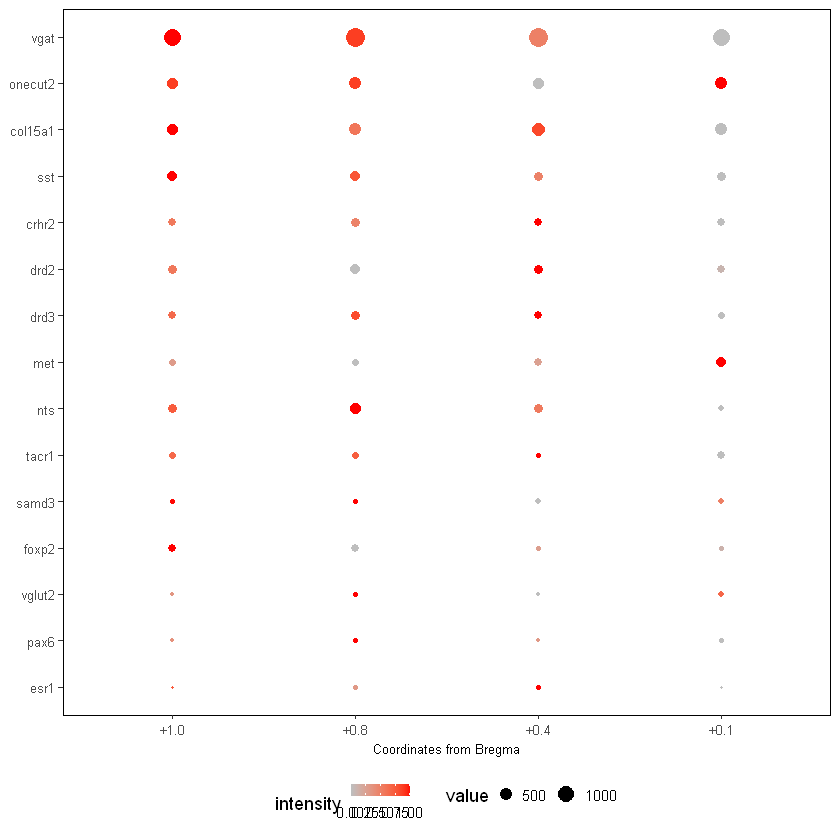

In [53]:
ggplot(df.dot, aes(x=variable, y=gene))+
  geom_point(aes(size=value, color=intensity))+
  scale_color_gradient(low = "gray",high = "red") +
  scale_size(range=c(0.5,5)) +
  theme_classic() +
  theme(panel.background = element_rect(colour = "black", size=.25, fill=NA, linetype="solid"),
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_text(size=8),
        legend.position='bottom',
        legend.key.size = unit(0.25, 'cm'))+
  xlab('Coordinates from Bregma') +
  ylab('Gene') +
  scale_x_discrete(labels=c('+1.0','+0.8','+0.4','+0.1'))

Proportion of cells

In [ ]:
WT.bind <- readRDS("master_files/spot_counts.rds")

In [ ]:
grab.spots<-colnames(WT.bind[grep('.Copies',colnames(WT.bind))])
WT.spots <- WT.bind[grab.spots]
rownames(WT.spots) <- WT.bind$barcode

In [ ]:
WT.spots[WT.spots < 5] <- 0
WT.spots[WT.spots > 0] <- 1

In [ ]:
head(WT.spots)

In [ ]:
WT1S2 <- WT.spots[grep("WT-1-S2",rownames(WT.spots)),]
WT1S3 <- WT.spots[grep("WT-1-S3",rownames(WT.spots)),]
WT1S4 <- WT.spots[grep("WT-1-S4",rownames(WT.spots)),]
WT1S5 <- WT.spots[grep("WT-1-S5",rownames(WT.spots)),]

In [ ]:
WT2S2 <- WT.spots[grep("WT-2-S2",rownames(WT.spots)),]
WT2S3 <- WT.spots[grep("WT-2-S3",rownames(WT.spots)),]
WT2S4 <- WT.spots[grep("WT-2-S4",rownames(WT.spots)),]
WT2S5 <- WT.spots[grep("WT-2-S6",rownames(WT.spots)),]

In [ ]:
WT3S2 <- WT.spots[grep("WT-3-S2",rownames(WT.spots)),]
WT3S3 <- WT.spots[grep("WT-3-S4",rownames(WT.spots)),]
WT3S4 <- WT.spots[grep("WT-3-S5",rownames(WT.spots)),]
WT3S5 <- WT.spots[grep("WT-3-S6",rownames(WT.spots)),]

In [ ]:
WT4S2 <- WT.spots[grep("WT-4-S3",rownames(WT.spots)),]
WT4S3 <- WT.spots[grep("WT-4-S4",rownames(WT.spots)),]
WT4S4 <- WT.spots[grep("WT-4-S5",rownames(WT.spots)),]

In [ ]:
WT5S3 <- WT.spots[grep("WT-5-S3",rownames(WT.spots)),]
WT5S4 <- WT.spots[grep("WT-5-S4",rownames(WT.spots)),]
WT5S5 <- WT.spots[grep("WT-5-S6",rownames(WT.spots)),]

In [ ]:
WT6S2 <- WT.spots[grep("WT-6-S2",rownames(WT.spots)),]
WT6S3 <- WT.spots[grep("WT-6-S3",rownames(WT.spots)),]
WT6S4 <- WT.spots[grep("WT-6-S4",rownames(WT.spots)),]
WT6S5 <- WT.spots[grep("WT-6-S5",rownames(WT.spots)),]

In [ ]:
WT7S3 <- WT.spots[grep("WT-7-S3",rownames(WT.spots)),]
WT7S4 <- WT.spots[grep("WT-7-S4",rownames(WT.spots)),]
WT7S5 <- WT.spots[grep("WT-7-S6",rownames(WT.spots)),]

In [ ]:
WT8S2 <- WT.spots[grep("WT-8-S2",rownames(WT.spots)),]
WT8S3 <- WT.spots[grep("WT-8-S3",rownames(WT.spots)),]
WT8S4 <- WT.spots[grep("WT-8-S4",rownames(WT.spots)),]
WT8S5 <- WT.spots[grep("WT-8-S6",rownames(WT.spots)),]

In [ ]:
WT1S2.s <- colSums(WT1S2)
WT1S3.s <- colSums(WT1S3)
WT1S4.s <- colSums(WT1S4)
WT1S5.s <- colSums(WT1S5)

WT2S2.s <- colSums(WT2S2)
WT2S3.s <- colSums(WT2S3)
WT2S4.s <- colSums(WT2S4)
WT2S5.s <- colSums(WT2S5)

WT3S2.s <- colSums(WT3S2)
WT3S3.s <- colSums(WT3S3)
WT3S4.s <- colSums(WT3S4)
WT3S5.s <- colSums(WT3S5)

WT4S2.s <- colSums(WT4S2)
WT4S3.s <- colSums(WT4S3)
WT4S4.s <- colSums(WT4S4)

WT5S2.s <- colSums(WT5S3)
WT5S3.s <- colSums(WT5S4)
WT5S5.s <- colSums(WT5S5)

WT6S2.s <- colSums(WT6S2)
WT6S3.s <- colSums(WT6S3)
WT6S4.s <- colSums(WT6S4)
WT6S5.s <- colSums(WT6S5)

WT7S3.s <- colSums(WT7S3)
WT7S4.s <- colSums(WT7S4)
WT7S5.s <- colSums(WT7S5)

WT8S2.s <- colSums(WT8S2)
WT8S3.s <- colSums(WT8S3)
WT8S4.s <- colSums(WT8S4)
WT8S5.s <- colSums(WT8S5)

In [ ]:
S1 <- data.frame(WT1S2.s, WT2S2.s, WT3S2.s, WT4S2.s, WT5S2.s, WT6S2.s, WT8S2.s)
S2 <- data.frame(WT1S3.s, WT2S3.s, WT3S3.s, WT4S3.s, WT5S3.s, WT6S3.s, WT7S3.s, WT8S3.s)
S3 <- data.frame(WT1S4.s, WT2S4.s, WT3S4.s, WT4S4.s, WT6S4.s, WT8S4.s)
S4 <- data.frame(WT1S5.s, WT2S5.s, WT3S5.s, WT5S5.s, WT6S5.s, WT8S5.s)

In [ ]:
S1<-data.frame(rowSums(S1))
S2<-data.frame(rowSums(S2))
S3<-data.frame(rowSums(S3))
S4<-data.frame(rowSums(S4))

In [ ]:
total <- cbind(S1, S2, S3, S4)

In [ ]:
total <- data.frame(rowSums(total))

In [ ]:
total.num <- length(rownames(WT.spots[rowSums(WT.spots) > 0,]))

In [ ]:
prop<-total/total.num*100

In [ ]:
prop

In [ ]:
rownames(prop) <- gsub('.Copies','',rownames(total))
prop$gene <- rownames(prop)

In [ ]:
prop

In [ ]:
prop <- prop[prop$gene != 'vgat',]

In [ ]:
prop$gene<-factor(prop$gene, levels=c('onecut2','col15a1','sst','crhr2','drd2','drd3','met','nts','tacr1','samd3','foxp2','vglut2','pax6','esr1'))

In [ ]:
ggplot(prop, aes(x=gene, y=rowSums.total.))+
    geom_bar(stat='identity') +
      theme_classic() +
      theme(
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        legend.position='none',
        legend.key.size = unit(0.25, 'cm')) +
        scale_y_continuous(expand = c(0, 0))
ggsave("Cell_prop.pdf", width=4, height=1)

In [ ]:
seq_tally <- readRDS(file='C:/Users/stuberadmin/Documents/HCR_analysis/graphs/seq_tally.rds')
seq_tally

In [ ]:
prop

In [ ]:
prop<- prop[match(seq_tally$gene,prop$gene),]

In [ ]:
prop

In [ ]:
df<-cbind(seq_tally, prop$rowSums.total.)

In [ ]:
df

In [ ]:
colnames(df) <- c("seq","gene","hcr")

In [ ]:
cor(df$seq, df$hcr)

In [ ]:
library(ggplot2)
library(ggrepel)
library(ggpubr)

In [ ]:
df

In [ ]:
df <- df[-c(9), ]  

In [ ]:
ggplot(df, aes(x=hcr, y=seq, label=gene)) +
    geom_point(size=0.5) +
    theme_classic() +
    geom_text_repel(size=2) +
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    geom_smooth(method='lm', color="red", fill="red", alpha=0.1, size=0.5)+
    xlab("HCR cell abundance (%)") + 
    ylab("scRNAseq cell abundance (%)")+
    stat_cor(size=2, label.sep=", ")
ggsave('cor_between_seq_hcr_no-vgat.pdf',width=1, height=1.5)

Coexpression heatmap

In [ ]:
WT.bind <- readRDS("master_files/spot_counts.rds")

In [ ]:
grab.spots<-colnames(WT.bind[grep('.Copies',colnames(WT.bind))])
WT.spots <- WT.bind[grab.spots]
rownames(WT.spots) <- WT.bind$barcode

In [ ]:
WT.spots[WT.spots < 5] <- 0
WT.spots[WT.spots >= 5] <- 1

In [ ]:
WT.spots

In [ ]:
WT1S2 <- WT.spots[grep("WT-1-S2",rownames(WT.spots)),]
WT1S3 <- WT.spots[grep("WT-1-S3",rownames(WT.spots)),]
WT1S4 <- WT.spots[grep("WT-1-S4",rownames(WT.spots)),]
WT1S5 <- WT.spots[grep("WT-1-S5",rownames(WT.spots)),]

In [ ]:
WT2S2 <- WT.spots[grep("WT-2-S2",rownames(WT.spots)),]
WT2S3 <- WT.spots[grep("WT-2-S3",rownames(WT.spots)),]
WT2S4 <- WT.spots[grep("WT-2-S4",rownames(WT.spots)),]
WT2S5 <- WT.spots[grep("WT-2-S6",rownames(WT.spots)),]

In [ ]:
WT3S2 <- WT.spots[grep("WT-3-S2",rownames(WT.spots)),]
WT3S3 <- WT.spots[grep("WT-3-S4",rownames(WT.spots)),]
WT3S4 <- WT.spots[grep("WT-3-S5",rownames(WT.spots)),]
WT3S5 <- WT.spots[grep("WT-3-S6",rownames(WT.spots)),]

In [ ]:
WT4S2 <- WT.spots[grep("WT-4-S3",rownames(WT.spots)),]
WT4S3 <- WT.spots[grep("WT-4-S4",rownames(WT.spots)),]
WT4S4 <- WT.spots[grep("WT-4-S5",rownames(WT.spots)),]

In [ ]:
WT5S3 <- WT.spots[grep("WT-5-S3",rownames(WT.spots)),]
WT5S4 <- WT.spots[grep("WT-5-S4",rownames(WT.spots)),]
WT5S5 <- WT.spots[grep("WT-5-S6",rownames(WT.spots)),]

In [ ]:
WT6S2 <- WT.spots[grep("WT-6-S2",rownames(WT.spots)),]
WT6S3 <- WT.spots[grep("WT-6-S3",rownames(WT.spots)),]
WT6S4 <- WT.spots[grep("WT-6-S4",rownames(WT.spots)),]
WT6S5 <- WT.spots[grep("WT-6-S5",rownames(WT.spots)),]

In [ ]:
WT7S3 <- WT.spots[grep("WT-7-S3",rownames(WT.spots)),]
WT7S4 <- WT.spots[grep("WT-7-S4",rownames(WT.spots)),]
WT7S5 <- WT.spots[grep("WT-7-S6",rownames(WT.spots)),]

In [ ]:
WT8S2 <- WT.spots[grep("WT-8-S2",rownames(WT.spots)),]
WT8S3 <- WT.spots[grep("WT-8-S3",rownames(WT.spots)),]
WT8S4 <- WT.spots[grep("WT-8-S4",rownames(WT.spots)),]
WT8S5 <- WT.spots[grep("WT-8-S6",rownames(WT.spots)),]

In [ ]:
S1 <- rbind(WT1S2, WT2S2, WT3S2, WT4S2, WT5S3, WT6S2, WT8S2)
S1 <- S1[S1$tacr1 > 0,]
S2 <- rbind(WT1S3, WT2S3, WT3S3, WT4S3, WT6S3, WT7S3, WT8S3)
S2 <- S2[S2$tacr1 > 0,]
S3 <- rbind(WT1S4, WT2S4, WT3S4, WT4S4, WT5S4, WT6S4, WT8S4)
S3 <- S3[S3$tacr1 > 0,]
S4 <- rbind(WT1S5, WT2S5, WT3S5, WT5S5, WT6S5, WT8S5)
S4 <- S4[S4$tacr1 > 0,]

In [ ]:
S1<-data.frame(colSums(S1))
S1<- S1/S1['tacr1.Copies',]*100
S2<-data.frame(colSums(S2))
S2<-S2/S2['tacr1.Copies',]*100
S3<-data.frame(colSums(S3))
S3<-S3/S3['tacr1.Copies',]*100
S4<-data.frame(colSums(S4))
S4<-S4/S4['tacr1.Copies',]*100

In [ ]:
total <- cbind(S1, S2, S3, S4)

In [ ]:
colnames(total) <- c('+1.0',"+0.8","+0.4","+0.1")

In [ ]:
rownames(total) <- gsub('.Copies','',rownames(total))

In [ ]:
total$gene <- rownames(total)
total$section <- colnames(total)
total

In [ ]:
#total <- total[-c(12,14,15),]

In [ ]:
library(reshape2)
library(ggplot2)
library(tibble)
df.spots <- melt(total)

In [ ]:
df.spots <-df.spots[df.spots$gene != "tacr1",]

In [ ]:
df.spots<-df.spots[order(df.spots$value),]

In [ ]:
df.spots$gene <- factor(df.spots$gene, levels = unique(df.spots$gene))

In [ ]:
ggplot(df.spots, aes(x=variable, y=gene, fill=value))+
  geom_tile()+
  geom_text(aes(label = round(value, 1)),size=2) +
  scale_fill_gradient(low = "white",high = "red") +
  theme_classic() +
  theme(panel.background = element_rect(colour = "black", size=.25, fill=NA, linetype="solid"),
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_text(size=8),
        legend.position='bottom',
        legend.key.size = unit(0.25, 'cm'))+
  xlab('Coordinates from Bregma') +
  ylab('Gene') +
  scale_x_discrete(labels=c('+1.0','+0.8','+0.4','+0.1')) 

ggsave('heatmap_tacr1_coexpression.svg',width=2, height=3.5)
ggsave('heatmap_tacr1_coexpression.pdf',width=2, height=3.5)

#### Either or 

In [ ]:
WT1S2 <- WT.spots[grep("WT-1-S2",rownames(WT.spots)),]
WT1S3 <- WT.spots[grep("WT-1-S3",rownames(WT.spots)),]
WT1S4 <- WT.spots[grep("WT-1-S4",rownames(WT.spots)),]
WT1S5 <- WT.spots[grep("WT-1-S5",rownames(WT.spots)),]

In [ ]:
WT2S2 <- WT.spots[grep("WT-2-S2",rownames(WT.spots)),]
WT2S3 <- WT.spots[grep("WT-2-S3",rownames(WT.spots)),]
WT2S4 <- WT.spots[grep("WT-2-S4",rownames(WT.spots)),]
WT2S5 <- WT.spots[grep("WT-2-S6",rownames(WT.spots)),]

In [ ]:
WT3S2 <- WT.spots[grep("WT-3-S2",rownames(WT.spots)),]
WT3S3 <- WT.spots[grep("WT-3-S4",rownames(WT.spots)),]
WT3S4 <- WT.spots[grep("WT-3-S5",rownames(WT.spots)),]
WT3S5 <- WT.spots[grep("WT-3-S6",rownames(WT.spots)),]

In [ ]:
WT4S2 <- WT.spots[grep("WT-4-S3",rownames(WT.spots)),]
WT4S3 <- WT.spots[grep("WT-4-S4",rownames(WT.spots)),]
WT4S4 <- WT.spots[grep("WT-4-S5",rownames(WT.spots)),]

In [ ]:
WT5S3 <- WT.spots[grep("WT-5-S3",rownames(WT.spots)),]
WT5S4 <- WT.spots[grep("WT-5-S4",rownames(WT.spots)),]
WT5S5 <- WT.spots[grep("WT-5-S6",rownames(WT.spots)),]

In [ ]:
WT6S2 <- WT.spots[grep("WT-6-S2",rownames(WT.spots)),]
WT6S3 <- WT.spots[grep("WT-6-S3",rownames(WT.spots)),]
WT6S4 <- WT.spots[grep("WT-6-S4",rownames(WT.spots)),]
WT6S5 <- WT.spots[grep("WT-6-S5",rownames(WT.spots)),]

In [ ]:
WT7S3 <- WT.spots[grep("WT-7-S3",rownames(WT.spots)),]
WT7S4 <- WT.spots[grep("WT-7-S4",rownames(WT.spots)),]
WT7S5 <- WT.spots[grep("WT-7-S6",rownames(WT.spots)),]

In [ ]:
WT8S2 <- WT.spots[grep("WT-8-S2",rownames(WT.spots)),]
WT8S3 <- WT.spots[grep("WT-8-S3",rownames(WT.spots)),]
WT8S4 <- WT.spots[grep("WT-8-S4",rownames(WT.spots)),]
WT8S5 <- WT.spots[grep("WT-8-S6",rownames(WT.spots)),]

In [ ]:
S1 <- rbind(WT1S2, WT2S2, WT3S2, WT4S2, WT5S3, WT6S2, WT8S2)
colnames(S1) <- gsub('.Copies',"",colnames(S1))
S2 <- rbind(WT1S3, WT2S3, WT3S3, WT4S3, WT6S3, WT7S3, WT8S3)
colnames(S2) <- gsub('.Copies',"",colnames(S2))
S3 <- rbind(WT1S4, WT2S4, WT3S4, WT4S4, WT5S4, WT6S4, WT8S4)
colnames(S3) <- gsub('.Copies',"",colnames(S3))
S4 <- rbind(WT1S5, WT2S5, WT3S5, WT5S5, WT6S5, WT8S5)
colnames(S4) <- gsub('.Copies',"",colnames(S4))

In [ ]:
S.all <- rbind(WT1S2, WT2S2, WT3S2, WT4S2, WT5S3, WT6S2, WT8S2, WT1S3, WT2S3, WT3S3, WT4S3, WT6S3, WT7S3, WT8S3, WT1S4, WT2S4, WT3S4, WT4S4, WT5S4, WT6S4, WT8S4, WT1S5, WT2S5, WT3S5, WT5S5, WT6S5, WT8S5)
colnames(S.all) <- gsub('.Copies',"",colnames(S.all))

In [ ]:
gene_list <- c('nts', 'sst','met','foxp2','crhr2','esr1','tacr1','pax6','drd3','samd3','onecut2','col15a1')

In [ ]:
#function to find overlap
calculate_overlap <- function(gene, gene_list, data){
    lista <- vector()
    S1.df <- data.frame()
        for (gene2 in gene_list) {
            either <- data[data[c(gene)] > 0 | data[c(gene2)] > 0,]
            both <- data[data[c(gene)] > 0 & data[c(gene2)] > 0,]
            overlap <- dim(both)[1]/dim(either)[1]*100
            lista[gene2] <- overlap
    }
    return(lista)
}
    

In [ ]:
gene_list

In [ ]:
gene_list2 <- c('nts.2','sst.2','met.2','foxp2.2','crhr2.2','esr1.2','tacr1.2','pax6.2','drd3.2','samd3.2','onecut2.2','col15a1.2')

In [ ]:
output.S1 <- data.frame(lapply(gene_list, calculate_overlap, gene_list=gene_list, data=S1))
colnames(output.S1) <- gene_list2

In [ ]:
output.S2 <- data.frame(lapply(gene_list, calculate_overlap, gene_list=gene_list, data=S2))
colnames(output.S2) <- gene_list2

In [ ]:
output.S3 <- data.frame(lapply(gene_list, calculate_overlap, gene_list=gene_list, data=S3))
colnames(output.S3) <- gene_list2

In [ ]:
output.S4 <- data.frame(lapply(gene_list, calculate_overlap, gene_list=gene_list, data=S4))
colnames(output.S4) <- gene_list2

In [ ]:
output.all <- data.frame(lapply(gene_list, calculate_overlap, gene_list=gene_list, data=S.all))
colnames(output.all) <- gene_list2

In [ ]:
output.S1

In [ ]:
output.S2

In [ ]:
output.S3

In [ ]:
output.S4

In [ ]:
output.all

In [ ]:
cor.df.long <-melt(data.matrix(output.S4), id=colnames(output.S4))

In [ ]:
new_order <- c('sst','nts','crhr2','col15a1','onecut2','met','drd3','tacr1','foxp2','pax6','esr1','samd3')

In [ ]:
new_order2 <- c('sst.2','nts.2','crhr2.2','col15a1.2','onecut2.2','met.2','drd3.2','tacr1.2','foxp2.2','pax6.2','esr1.2','samd3.2')

In [ ]:
cor.df.long$Var1<-factor(cor.df.long$Var1, levels=rev(new_order))

In [ ]:
cor.df.long$Var2<-factor(cor.df.long$Var2, levels=(new_order2))

In [ ]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient(low='white',high='darkred',limits=c(0,30)) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/graphs/overlap_S1.pdf',width=2, height=2)

In [ ]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient(low='white',high='darkred',limits=c(0,30)) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/graphs/overlap_S2.pdf',width=2, height=2)

In [ ]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient(low='white',high='darkred',limits=c(0,30)) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/graphs/overlap_S3.pdf',width=2, height=2)

In [ ]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient(low='white',high='darkred',limits=c(0,30)) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/graphs/overlap_S4.pdf',width=2, height=2)

In [ ]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient(low='white',high='darkred',limits=c(0,30)) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()

In [ ]:
pdf('C:/Users/stuberadmin/Documents/HCR_analysis/graphs/dendrogram_overlap4.pdf',width=10, height=10)
plot(hclust(dist(output.all)), hang=-1)
dev.off()

In [ ]:
hclust(dist(output.all))$labels

In [ ]:
output.S1

In [ ]:
library(reshape2)
library(ggplot2)
library(tibble)

In [ ]:
nts.heatmap <- data.frame('S1' = output.S1$nts.2,
           'S2' = output.S2$nts.2,
           'S3' = output.S3$nts.2,
           'S4' = output.S4$nts.2)
rownames(nts.heatmap) <- rownames(output.S1)

In [ ]:
nts.heatmap <- nts.heatmap[-c(1),]

In [ ]:
colnames(nts.heatmap) <- c('+1.0',"+0.8","+0.4","+0.1")

In [ ]:
nts.heatmap$gene <- rownames(nts.heatmap)

In [ ]:
nts.heatmap <- melt(nts.heatmap)

In [ ]:
nts.heatmap$gene <- factor(nts.heatmap$gene, levels = rev(rownames(output.all)))

In [ ]:
ggplot(nts.heatmap, aes(x=variable, y=gene, fill=value))+
  geom_tile()+
  geom_text(aes(label = round(value, 1)),size=2) +
  scale_fill_gradient(low = "white",high = "red") +
  theme_classic() +
  theme(panel.background = element_rect(colour = "black", size=.25, fill=NA, linetype="solid"),
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_text(size=8),
        legend.position='bottom',
        legend.key.size = unit(0.25, 'cm'))+
  xlab('Coordinates from Bregma') +
  ylab('Gene') +
  scale_x_discrete(labels=c('+1.0','+0.8','+0.4','+0.1')) 
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/graphs/nts_heatmap.pdf',width=2, height=3.5)

In [ ]:
df.spots <-df.spots[df.spots$gene != "nts",]

In [ ]:
df.spots<-df.spots[order(df.spots$value),]

In [ ]:
df.spots$gene <- factor(df.spots$gene, levels = unique(df.spots$gene))

In [ ]:
ggplot(df.spots, aes(x=variable, y=gene, fill=value))+
  geom_tile()+
  geom_text(aes(label = round(value, 1)),size=2) +
  scale_fill_gradient(low = "white",high = "red") +
  theme_classic() +
  theme(panel.background = element_rect(colour = "black", size=.25, fill=NA, linetype="solid"),
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_text(size=8),
        legend.position='bottom',
        legend.key.size = unit(0.25, 'cm'))+
  xlab('Coordinates from Bregma') +
  ylab('Gene') +
  scale_x_discrete(labels=c('+1.0','+0.8','+0.4','+0.1')) 

#ggsave('heatmap_nts_coexpression.svg',width=2, height=3.5)
#ggsave('heatmap_nts_coexpression.pdf',width=2, height=3.5)

In [ ]:
ggplot(df.spots, aes(x=variable, y=gene, fill=value))+
  geom_tile()+
  geom_text(aes(label = round(value, 1)),size=2) +
  scale_fill_gradient(low = "white",high = "red") +
  theme_classic() +
  theme(panel.background = element_rect(colour = "black", size=.25, fill=NA, linetype="solid"),
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=8),
        axis.text.x = element_text( size=8),
        axis.title.y = element_blank(),
        axis.title.x = element_text(size=8),
        legend.position='bottom',
        legend.key.size = unit(0.25, 'cm'))+
  xlab('Coordinates from Bregma') +
  ylab('Gene') +
  scale_x_discrete(labels=c('+1.0','+0.8','+0.4','+0.1')) 

#ggsave('heatmap_met_coexpression.svg',width=2, height=3.5)
#ggsave('heatmap_met_coexpression.pdf',width=2, height=3.5)